<a href="https://colab.research.google.com/github/dileepthoutam/ml-lab/blob/master/decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)

In [4]:
df.groupby(['Outcome']).median()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,2.0,107.0,70.0,27.0,102.5,30.1,0.336,27.0
1,4.0,140.0,74.5,32.0,169.5,34.3,0.449,36.0


In [5]:
def median_target(cols):
    for var in cols:
        df[var].fillna(df.groupby(['Outcome'])[var].transform('median'), inplace=True)

In [6]:
list_cols = df.columns.values.tolist()
median_target(list_cols)

In [8]:
feature_cols = ['Insulin', 'BMI', 'Age', 'Glucose', 'BloodPressure', 'DiabetesPedigreeFunction']
x = df[feature_cols]
y = df.Outcome

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/3, random_state=0)

In [11]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf = clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [13]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

0.85546875


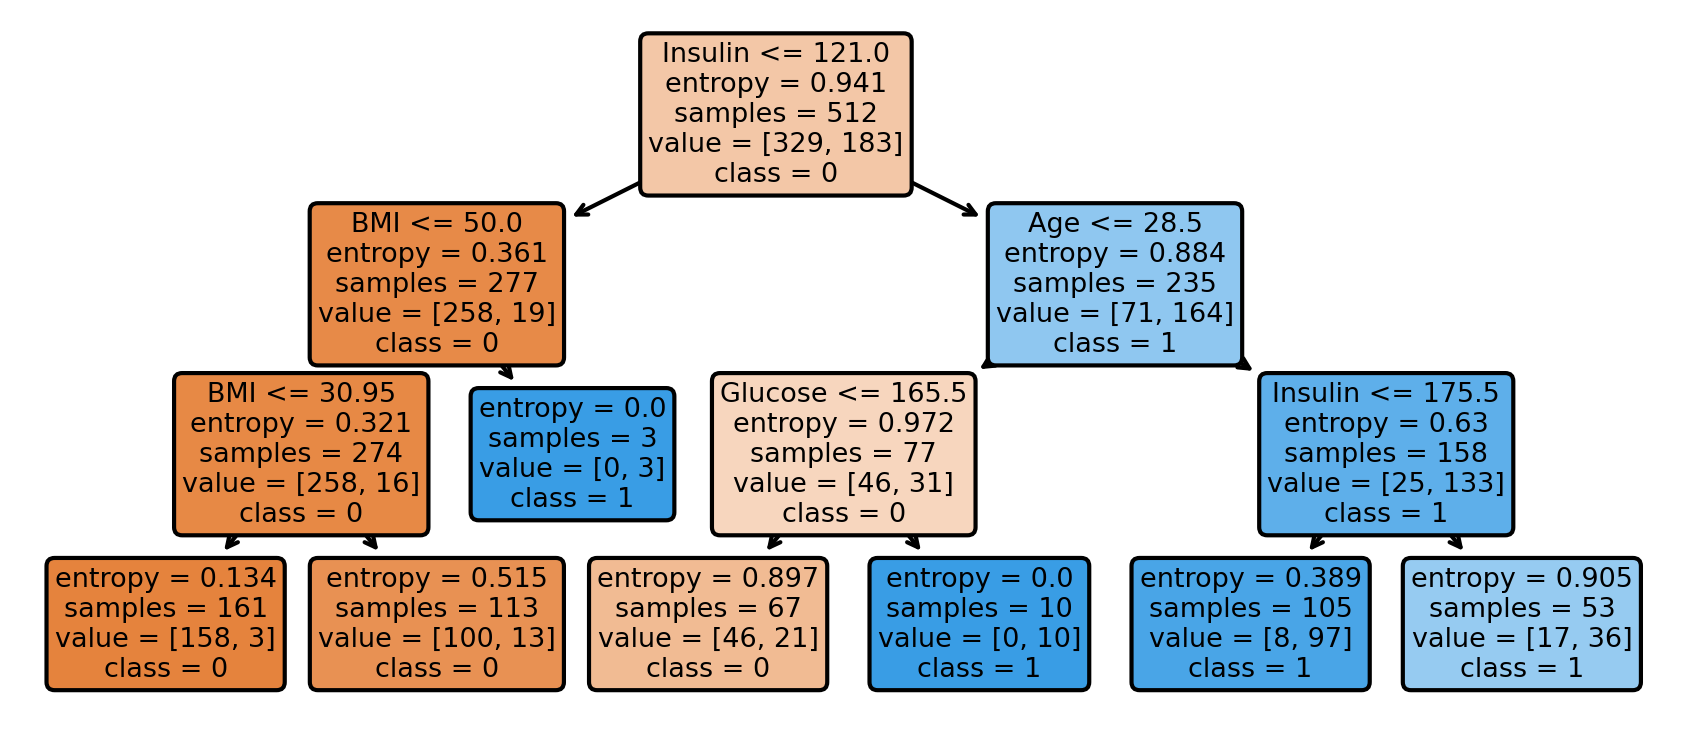

In [15]:
from sklearn import tree
plt.figure(figsize=(7, 3), dpi=300)
tree.plot_tree(clf, feature_names=feature_cols, class_names=["0", "1"], filled=True, rounded=True)
plt.show()